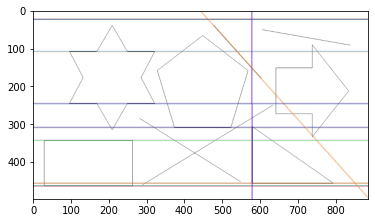

In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2    
from heapq import *
from math import cos, sin, pi, radians as d2r, degrees as r2d

def draw(o, p, image):
    
    height, width = image.shape[:2]
    d     = int(height + width)
        
    con = lambda x, y: (x, height-y)

    start = con(int(p * cos(d2r(o)) + d * cos(d2r(o-90))), int((p * sin(d2r(o)) + d * sin(d2r(o-90)))))
    stop  = con(int(p * cos(d2r(o)) - d * cos(d2r(o-90))), int((p * sin(d2r(o)) - d * sin(d2r(o-90)))))

    return cv2.line(image, start, stop, 255*np.random.rand(3), 1)


def HT(image,
       min_ang=0, max_ang=180,
       dang=1, drho=1,
       threshold=200, top=100, 
       length=200, resize=0):
    
    height, width = image.shape[:2]

    if resize>1:
        image = cv2.resize(image, (int(width/resize), int(height/resize)))
        height, width = image.shape[:2]
        length = int(length/resize)

    edges = cv2.Canny(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY),50,200)

    min_rho, max_rho = 0, int((height**2 + width**2)**0.5 + 1)
    
    total_ang = 1 + (max_ang - min_ang)//dang

    rho_arr = np.arange(min_rho, max_rho, drho)
    ang_arr = np.linspace(min_ang, max_ang, total_ang)
    total_rho = len(rho_arr)
    
    con = lambda col, row: (col, height-row)
    
    hough_space = [[0 for i in range(total_rho)] for i in range(total_ang)]
    
    for row in range(height):
        for col in range(width):
            if edges[row][col] > threshold:
                for i, angle in enumerate(ang_arr):
                    x, y = con(col, row)
                    rho = int((x*cos(d2r(angle)) + y*sin(d2r(angle)))/drho)
                    if 0<=rho<total_rho:
                        hough_space[i][rho] += 1
                    
    max_heap = []
    for i in range(total_ang):
        for j in range(total_rho):
            heappush(max_heap, (-hough_space[i][j], ang_arr[i], rho_arr[j]))

    for i in range(top):
        val, o, p = heappop(max_heap)
        if -val < length:
            break
        
        image = draw(o, p, image)
                    
    return image
    

path = 'C:\\Users\\Danish Amin\\Desktop\\'
# file = path + 'table.jpeg'
# file = path + 'line1.png'
# file = path + 'sqaure.png'
file = path + 'test1.png'

kernel = np.ones((2,2))

im1 = cv2.imread(file, 0)
image = cv2.imread(file)

final = HT(image,
       min_ang=0, max_ang=180,
       dang=3, drho=1,
       threshold=200, top=50,
       length=200, resize=1.3)

# cv2.imshow('final', final)
cv2.waitKey(0)
cv2.destroyAllWindows()


plt.imshow(final)
plt.show()